<a href="https://colab.research.google.com/github/hsnbnaa/deep-learning-is-easy/blob/main/Week%202/Google%20Colab/Tugas_week_2_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from collections import Counter
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import gzip
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Regression Linear

## Data Exploring

In [74]:
data = pd.read_csv('https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/Dataset/secondhanddataset.csv')

In [75]:
data

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [77]:
data.duplicated().sum()

0

<Axes: >

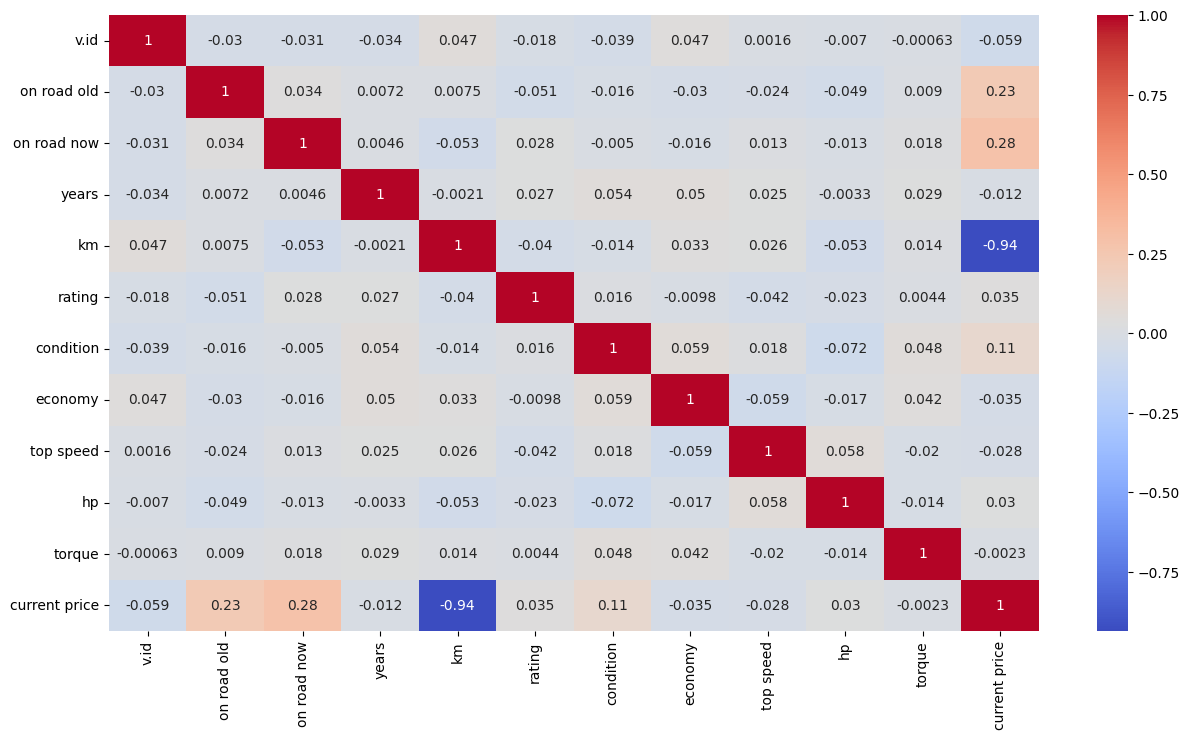

In [78]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

<Axes: >

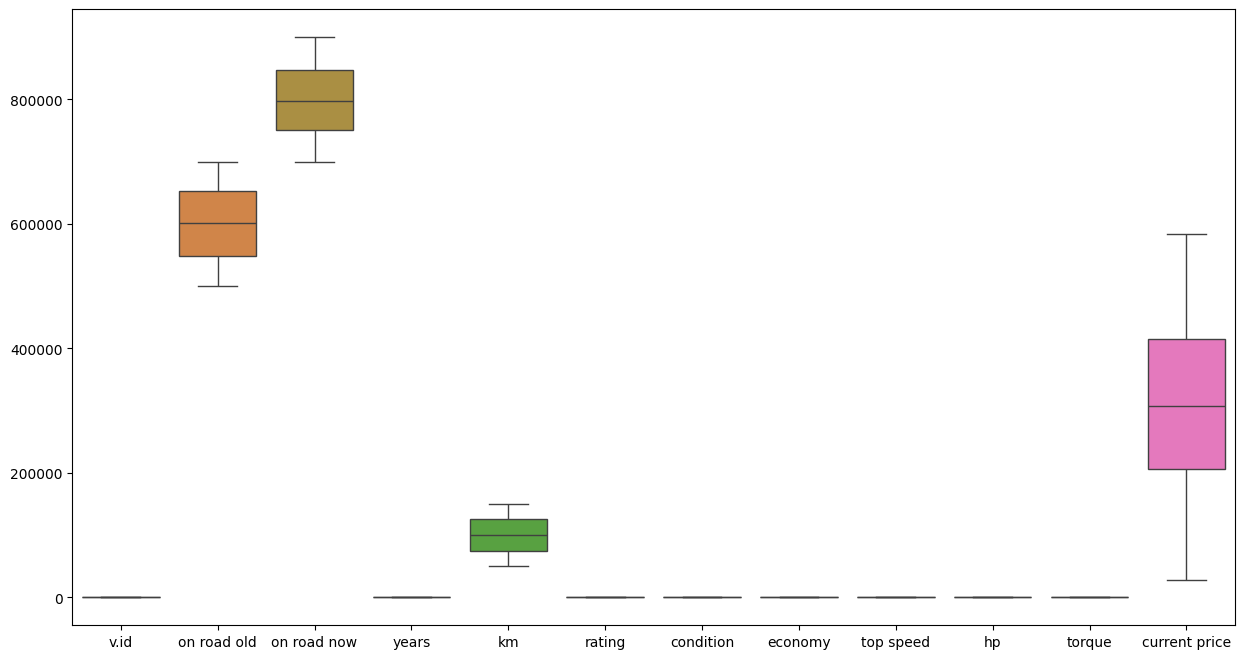

In [79]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data)

## Pre-Processing Data

In [80]:
y = data['current price']
X = data.drop('current price', axis=1)

In [81]:
y.min(), y.max()

(28226.5, 584267.5)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [85]:
y_train = scaler.fit_transform(y_train.reshape(-1, 1))
y_test = scaler.transform(y_test.reshape(-1, 1))

# TensorFLow Model

In [86]:
X_train.shape

(800, 11)

In [87]:
inputs = tf.keras.Input(shape=(11, ))
hidden = tf.keras.layers.Dense(16, activation='relu')(inputs)
outputs = tf.keras.layers.Dense(1, activation='linear')(hidden)

tf_model = tf.keras.Model(inputs, outputs)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Callback untuk mencetak log setiap 10 epochs
print_callback = LambdaCallback(
    on_epoch_end=lambda epoch, logs: print(f"Epoch {epoch+1}: Loss={logs['loss']:.4f}, Val Loss={logs['val_loss']:.4f}")
    if (epoch + 1) % 10 == 0 else None
)

tf_model.compile(
    optimizer='adam',
    loss='mse'
)

history = tf_model.fit(
    X_train,
    y_train,
    validation_split=0.15,
    batch_size=32,
    epochs=1000,
    verbose=0,
    callbacks=[early_stopping, print_callback]
)

Epoch 10: Loss=0.2940, Val Loss=0.2957
Epoch 20: Loss=0.0624, Val Loss=0.0703
Epoch 30: Loss=0.0316, Val Loss=0.0379
Epoch 40: Loss=0.0194, Val Loss=0.0242
Epoch 50: Loss=0.0142, Val Loss=0.0179
Epoch 60: Loss=0.0116, Val Loss=0.0146
Epoch 70: Loss=0.0101, Val Loss=0.0130
Epoch 80: Loss=0.0091, Val Loss=0.0122
Epoch 90: Loss=0.0081, Val Loss=0.0115
Epoch 100: Loss=0.0075, Val Loss=0.0110
Epoch 110: Loss=0.0069, Val Loss=0.0104
Epoch 120: Loss=0.0063, Val Loss=0.0102
Epoch 130: Loss=0.0057, Val Loss=0.0097
Epoch 140: Loss=0.0052, Val Loss=0.0092
Epoch 150: Loss=0.0047, Val Loss=0.0090
Epoch 160: Loss=0.0043, Val Loss=0.0083
Epoch 170: Loss=0.0040, Val Loss=0.0079
Epoch 180: Loss=0.0036, Val Loss=0.0073
Epoch 190: Loss=0.0033, Val Loss=0.0066
Epoch 200: Loss=0.0030, Val Loss=0.0059
Epoch 210: Loss=0.0026, Val Loss=0.0054
Epoch 220: Loss=0.0023, Val Loss=0.0050
Epoch 230: Loss=0.0020, Val Loss=0.0044
Epoch 240: Loss=0.0018, Val Loss=0.0040
Epoch 250: Loss=0.0017, Val Loss=0.0035
Epoch 260

In [88]:
y_test = scaler.inverse_transform(y_test)

In [89]:
y_pred_tf_scaled = tf_model.predict(X_test)
y_pred_tf = scaler.inverse_transform(y_pred_tf_scaled)

tf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tf))
tf_r2 = r2_score(y_test, y_pred_tf)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [90]:
tf_rmse, tf_r2

(1942.656108471598, 0.9997755089620322)

In [91]:
y_test.min(), y_test.max()

(58384.0, 559074.0)

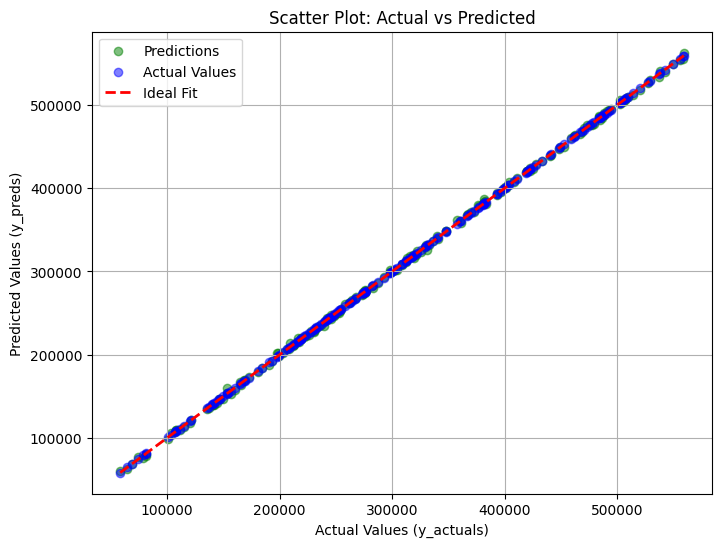

In [92]:
plt.figure(figsize=(8, 6))

# Ubah warna prediksi menjadi hijau, sedangkan actual tetap biru
plt.scatter(y_test, y_pred_tf, alpha=0.5, color='green', label='Predictions')
plt.scatter(y_test, y_test, alpha=0.5, color='blue', label='Actual Values')

# Garis ideal (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
         color='red', linestyle='--', linewidth=2, label='Ideal Fit')

# Label dan judul
plt.xlabel("Actual Values (y_actuals)")
plt.ylabel("Predicted Values (y_preds)")
plt.title("Scatter Plot: Actual vs Predicted")
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()


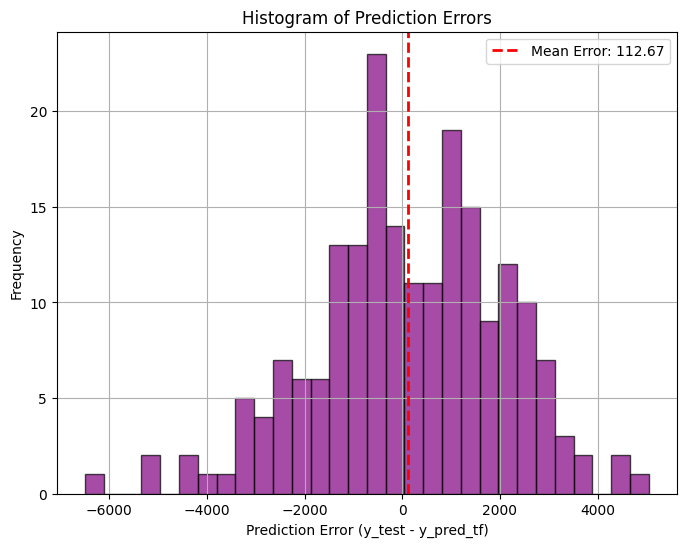

In [93]:
# Pastikan y_test dan y_pred_tf berbentuk array 1D
y_test_np = y_test.flatten()
y_pred_np = y_pred_tf.flatten()

# Hitung error (selisih antara y_test dan y_pred_tf)
errors = y_test_np - y_pred_np  # Harus berbentuk array 1D

# Buat histogram error
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, color='purple', alpha=0.7, edgecolor='black')

# Tambahkan garis rata-rata error
plt.axvline(np.mean(errors), color='red', linestyle='dashed', linewidth=2, label=f'Mean Error: {np.mean(errors):.2f}')

# Label dan judul
plt.xlabel("Prediction Error (y_test - y_pred_tf)")
plt.ylabel("Frequency")
plt.title("Histogram of Prediction Errors")
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()


# PyTorch Model

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [96]:
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

In [97]:
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [98]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [99]:
class SimpleRegression(nn.Module):
  def __init__(self):
    super(SimpleRegression, self).__init__()
    self.layer1 = nn.Linear(11, 16)
    self.out = nn.Linear(16, 1)

  def forward(self, x):
    x = F.relu(self.layer1(x))
    x = self.out(x)
    return x

regresi = SimpleRegression()

In [100]:
optimizer = optim.Adam(regresi.parameters(), lr=0.001)
criterion = nn.MSELoss()

In [101]:
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

best_loss = float('inf')
patience = 5
counter = 0

for epoch in range(1, 1000):
  regresi.train()
  total_loss=0
  for x, target in train_loader:
    optimizer.zero_grad()
    output = regresi(x)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    total_loss += loss.item()

  avg_loss = total_loss / len(train_loader)
  if epoch % 10 == 0:
    print(f'Epoch: {epoch}, loss: {avg_loss:.4f}')

  if avg_loss < best_loss:
    best_loss = avg_loss
    best_model = regresi.state_dict()
    counter = 0
  else:
    counter += 1
    if counter >= patience:
        print(f"Early stopping at epoch {epoch}")
        regresi.load_state_dict(best_model)
        break


Epoch: 10, loss: 0.1350
Epoch: 20, loss: 0.0140
Epoch: 30, loss: 0.0085
Epoch: 40, loss: 0.0061
Epoch: 50, loss: 0.0047
Epoch: 60, loss: 0.0039
Epoch: 70, loss: 0.0034
Epoch: 80, loss: 0.0032
Epoch: 90, loss: 0.0029
Epoch: 100, loss: 0.0027
Epoch: 110, loss: 0.0025
Epoch: 120, loss: 0.0023
Epoch: 130, loss: 0.0022
Epoch: 140, loss: 0.0019
Epoch: 150, loss: 0.0017
Epoch: 160, loss: 0.0015
Epoch: 170, loss: 0.0014
Epoch: 180, loss: 0.0012
Epoch: 190, loss: 0.0010
Epoch: 200, loss: 0.0009
Epoch: 210, loss: 0.0008
Epoch: 220, loss: 0.0007
Epoch: 230, loss: 0.0006
Epoch: 240, loss: 0.0005
Epoch: 250, loss: 0.0005
Early stopping at epoch 253


In [102]:
regresi.eval()
total_loss = 0

y_pred = []
y_actual = []

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

with torch.no_grad():
  for x, target in test_loader:
    output = regresi(x)
    y_pred.extend(output.numpy().flatten())
    y_actual.extend(target.numpy().flatten())
    loss = criterion(output, target)
    total_loss += loss.item()


In [103]:
# Asumsi kita punya scaler yang digunakan untuk normalisasi data (MinMaxScaler atau StandardScaler)
y_pred = scaler.inverse_transform(np.array(y_pred).reshape(-1, 1))
y_actual = scaler.inverse_transform(np.array(y_actual).reshape(-1, 1))

# Hitung RMSE setelah inverse transform
torch_rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
torch_r2 = r2_score(y_actual, y_pred)

In [104]:
torch_rmse, torch_r2

(3202.849980876407, 0.9993897676467896)

In [105]:
y_actual.min(), y_actual.max()

(58383.996, 559074.0)

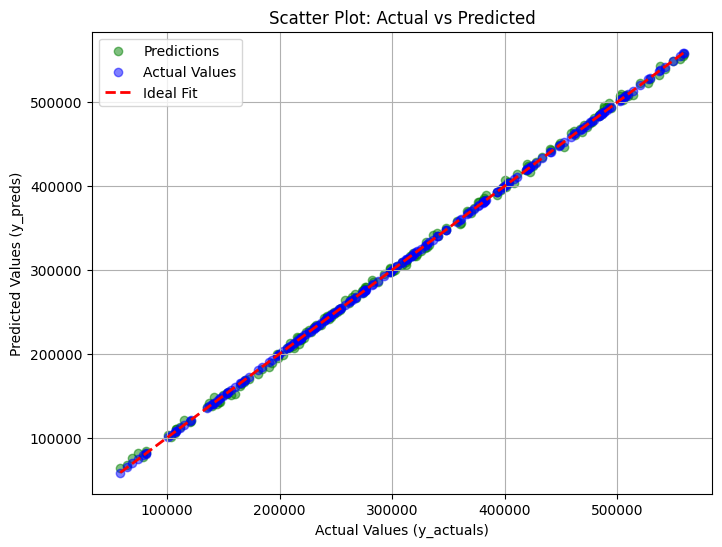

In [106]:
plt.figure(figsize=(8, 6))

# Ubah warna prediksi menjadi hijau, sedangkan actual tetap biru
plt.scatter(y_actual, y_pred, alpha=0.5, color='green', label='Predictions')
plt.scatter(y_actual, y_actual, alpha=0.5, color='blue', label='Actual Values')

# Garis ideal (y = x)
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)],
         color='red', linestyle='--', linewidth=2, label='Ideal Fit')

# Label dan judul
plt.xlabel("Actual Values (y_actuals)")
plt.ylabel("Predicted Values (y_preds)")
plt.title("Scatter Plot: Actual vs Predicted")
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()

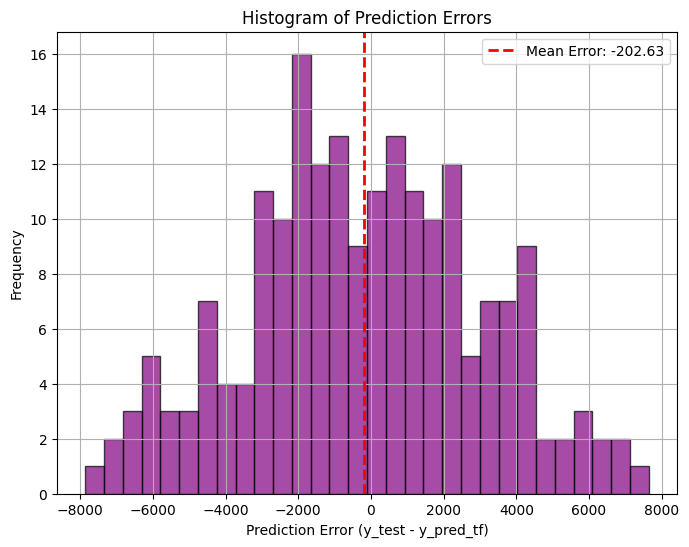

In [107]:
# Pastikan y_test dan y_pred_tf berbentuk array 1D
y_test_np = np.array(y_actual)
y_pred_np = np.array(y_pred)

# Hitung error (selisih antara y_test dan y_pred_tf)
errors = y_test_np - y_pred_np  # Harus berbentuk array 1D

# Buat histogram error
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, color='purple', alpha=0.7, edgecolor='black')

# Tambahkan garis rata-rata error
plt.axvline(np.mean(errors), color='red', linestyle='dashed', linewidth=2, label=f'Mean Error: {np.mean(errors):.2f}')

# Label dan judul
plt.xlabel("Prediction Error (y_test - y_pred_tf)")
plt.ylabel("Frequency")
plt.title("Histogram of Prediction Errors")
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()


# Classification Model

## Data Exploring

In [108]:
data = pd.read_csv('covert.gz', compression='gzip')

In [109]:
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,1,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,1,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,1,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,1,0,3


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Soil_Type1                          581012 non-null 

In [111]:
data.duplicated().sum()

0

<Axes: >

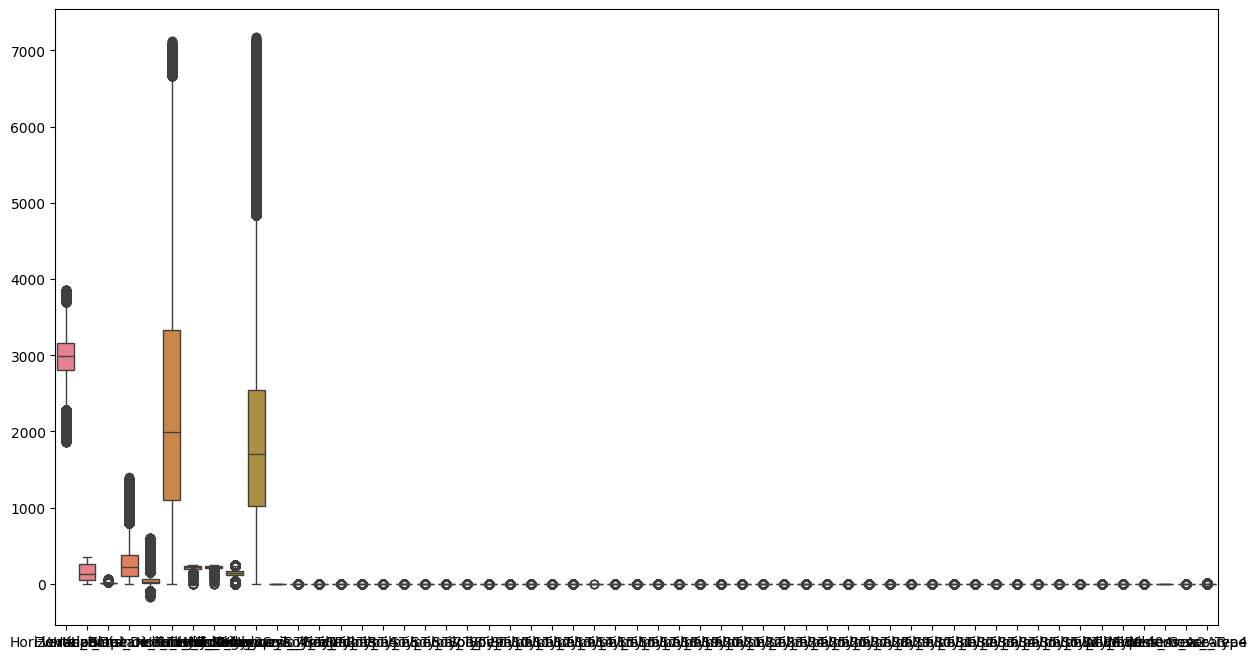

In [112]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data)

In [113]:
data.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,...,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612,0.238164,0.066550,-0.619374,-0.269554
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,...,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866,0.055988,0.074904,0.082687,0.017080
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,...,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637,-0.036253,0.125663,0.255503,0.148285
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,...,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020,0.055726,0.122028,-0.100433,-0.020317
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,...,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006,-0.008709,0.146839,0.077792,0.081664
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,...,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052,-0.200411,-0.232933,-0.270349,-0.153450
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,...,0.027870,0.007865,0.010332,0.015108,-0.029620,-0.000016,-0.006181,-0.100565,-0.200282,-0.035415
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,...,0.005863,0.016239,-0.022707,0.042952,-0.071961,-0.040176,0.042392,0.048646,-0.195733,-0.096426
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,...,-0.016482,0.001330,-0.022064,0.022187,-0.029040,-0.024254,0.034707,0.090757,0.018860,-0.048290
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,...,-0.000081,-0.010595,0.004180,-0.019740,-0.003301,0.008915,0.027473,-0.277510,-0.236548,-0.108936


## Pre-processing Data

In [146]:
y = data['Cover_Type']
X = data.drop('Cover_Type', axis=1)

In [147]:
Counter(y)

Counter({5: 9493, 2: 283301, 1: 211840, 7: 20510, 3: 35754, 6: 17367, 4: 2747})

In [148]:
undersample = RandomUnderSampler(sampling_strategy={1: 40000, 2: 40000})
X_under, y_under = undersample.fit_resample(X, y)

oversample = SMOTE(sampling_strategy={3: 40000, 4: 40000, 5: 40000, 6: 40000, 7: 40000})
X_resampled, y_resampled = oversample.fit_resample(X_under, y_under)

Counter(y_resampled)

Counter({1: 40000, 2: 40000, 3: 40000, 4: 40000, 5: 40000, 6: 40000, 7: 40000})

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [150]:
y_train = y_train - 1
y_test = y_test - 1

In [151]:
Counter(y_train)

Counter({3: 31994, 1: 31967, 5: 31978, 0: 32065, 4: 31955, 2: 32096, 6: 31945})

In [152]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [153]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Tensorflow Model

In [122]:
inputs = tf.keras.Input(shape=(X_train.shape[1], ))
hidden = tf.keras.layers.Dense(256, activation='relu')(inputs)
hidden = tf.keras.layers.Dense(128, activation='relu')(hidden)
hidden = tf.keras.layers.Dense(64, activation='relu')(hidden)
outputs = tf.keras.layers.Dense(7, activation='softmax')(hidden)

tf_model = tf.keras.Model(inputs, outputs)

eearly_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

tf_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

tf_model.fit(
    X_train,
    y_train,
    validation_split=0.15,
    batch_size=128,
    epochs=100,
    callbacks=[early_stopping]
)


Epoch 1/100
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7136 - loss: 0.7086 - val_accuracy: 0.8141 - val_loss: 0.4601
Epoch 2/100
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8251 - loss: 0.4332 - val_accuracy: 0.8549 - val_loss: 0.3628
Epoch 3/100
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8585 - loss: 0.3564 - val_accuracy: 0.8715 - val_loss: 0.3253
Epoch 4/100
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8746 - loss: 0.3173 - val_accuracy: 0.8820 - val_loss: 0.2985
Epoch 5/100
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8888 - loss: 0.2830 - val_accuracy: 0.8966 - val_loss: 0.2719
Epoch 6/100
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8976 - loss: 0.2636 - val_accuracy: 0.9004 - val_loss: 0.2605
Epoch 7/100
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9060 - loss: 0.2461 - val_accuracy: 0.9002 - val_loss: 0.2561
Epoch 8/100
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9094 - los

1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Accuracy: 0.9493
Precision: 0.9491
Recall: 0.9493
F1 Score: 0.9490
ROC AUC Score: 0.9967


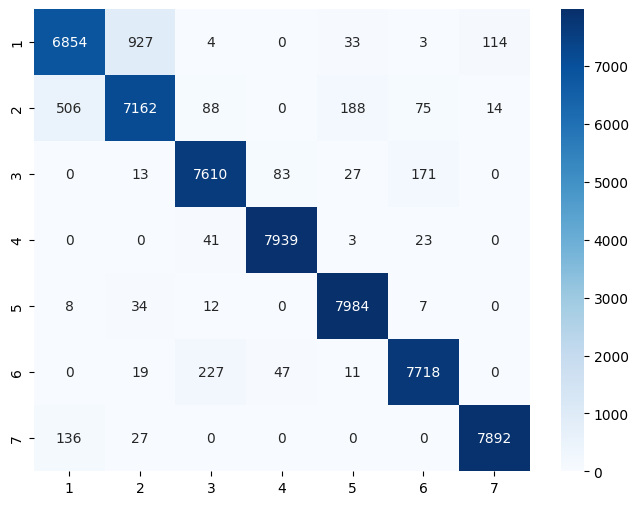

In [123]:
y_pred_probs = tf_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

y_pred = y_pred + 1
y_test = y_test + 1

cm = confusion_matrix(y_test, y_pred)

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')
# Visualisasi dengan Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

print(f"\nAccuracy: {acc:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}\nROC AUC Score: {roc_auc:.4f}")

# PyTorch Model

In [124]:
X_train.shape

(224000, 54)

In [ ]:
y_test = y_test - 1

In [154]:
class SimpleClassification(nn.Module):
  def __init__(self):
    super(SimpleClassification, self).__init__()
    self.layer1 = nn.Linear(X_train.shape[1], 256)
    self.layer2 = nn.Linear(256, 128)
    self.layer3 = nn.Linear(128, 64)
    self.out = nn.Linear(64, 7)
  def forward(self, x):
    x = F.relu(self.layer1(x))
    x = F.relu(self.layer2(x))
    x = F.relu(self.layer3(x))
    x = self.out(x)
    return x

classy = SimpleClassification()

In [155]:
y_train

array([3, 3, 1, ..., 5, 6, 4])

In [156]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

In [157]:
optimizer = optim.Adam(classy.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [129]:
y_train.dtype

torch.int64

In [158]:
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

best_loss = float('inf')
patience = 5
counter = 0

for epoch in range(1, 100):
  classy.train()
  total_loss=0
  for x, target in train_loader:
    optimizer.zero_grad()
    output=classy(x)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    total_loss += loss.item()

  avg_loss = total_loss / len(train_loader)
  if epoch % 10 == 0:
    print(f'Epoch: {epoch}, Loss: {avg_loss:.4f}')

  if avg_loss < best_loss:
    best_loss = avg_loss
    best_model = classy.state_dict()
    counter = 0
  else:
    counter += 1
    if counter >= patience:
        print(f"Early stopping at epoch {epoch}")
        classy.load_state_dict(best_model)
        break

Epoch: 10, Loss: 0.2142
Epoch: 20, Loss: 0.1572
Epoch: 30, Loss: 0.1306
Epoch: 40, Loss: 0.1127
Epoch: 50, Loss: 0.1014
Epoch: 60, Loss: 0.0925
Epoch: 70, Loss: 0.0887
Epoch: 80, Loss: 0.0820
Epoch: 90, Loss: 0.0766


In [159]:
classy.eval()

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=True)

y_pred_probs = []
y_actual = []

with torch.no_grad():
  for x, target in test_loader:
    output = classy(x)
    probabilities = F.softmax(output, dim=1).numpy()
    y_pred_probs.extend(probabilities)
    y_actual.extend(target.numpy())
    loss = criterion(output, target)
    total_loss += loss.item()



Accuracy: 0.9563
Precision: 0.9561
Recall: 0.9563
F1 Score: 0.9561
ROC AUC Score: 0.9974


<Axes: >

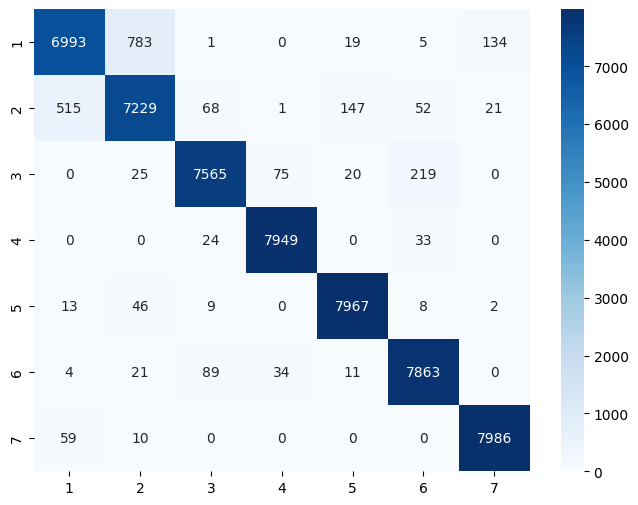

In [160]:
y_pred = np.argmax(y_pred_probs, axis=1) + 1
y_actual = np.array(y_actual) + 1

cm = confusion_matrix(y_actual, y_pred)

accuracy = accuracy_score(y_actual, y_pred)
precision = precision_score(y_actual, y_pred, average='weighted')
recall = recall_score(y_actual, y_pred, average='weighted')
f1 = f1_score(y_actual, y_pred, average='weighted')
roc = roc_auc_score(y_actual, y_pred_probs, multi_class='ovr')

# Visualisasi dengan Seaborn
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_actual), yticklabels=np.unique(y_actual))